# 1. Getting started with scikit-learn

In [1]:
import numpy as np
import scipy.stats as st
import sklearn.linear_model as lm
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def f(x):
    return np.exp(3 * x)

In [3]:
x_tr = np.linspace(0., 2, 200)
y_tr = f(x_tr)

In [4]:
x = np.array([0, .1, .2, .5, .8, .9, 1])
y = f(x) + 2 * np.random.randn(len(x))

Text(0.5, 1.0, 'Generative model')

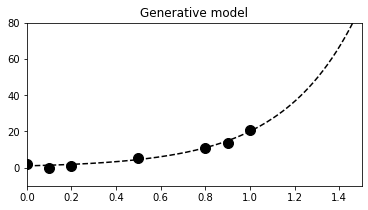

In [5]:
fig, ax = plt.subplots(1, 1, figsize=(6, 3))
ax.plot(x_tr, y_tr, '--k')
ax.plot(x, y, 'ok', ms=10)
ax.set_xlim(0, 1.5)
ax.set_ylim(-10, 80)
ax.set_title('Generative model')

In [6]:
# We create the model.
lr = lm.LinearRegression()
# We train the model on our training dataset.
lr.fit(x[:, np.newaxis], y)
# Now, we predict points with our trained model.
y_lr = lr.predict(x_tr[:, np.newaxis])

Text(0.5, 1.0, 'Linear regression')

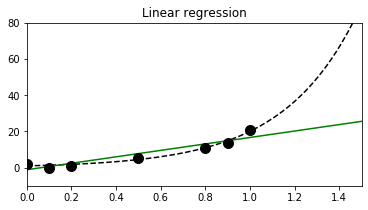

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(6, 3))
ax.plot(x_tr, y_tr, '--k')
ax.plot(x_tr, y_lr, 'g')
ax.plot(x, y, 'ok', ms=10)
ax.set_xlim(0, 1.5)
ax.set_ylim(-10, 80)
ax.set_title("Linear regression")

Coefficients, degree 2:
	 26.79 -8.99 0.00
Coefficients, degree 5:
	 8.15 129.96 -264.74 178.07 -32.56 0.00
Coefficients, degree 8:
	 325.01 -432.97 -266.33 371.66 468.46 -739.64 340.95 -48.26 0.00


Text(0.5, 1.0, 'Linear regression')

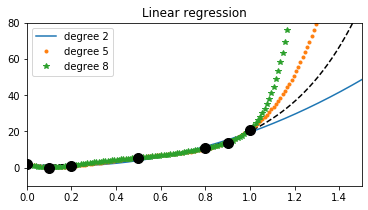

In [8]:
lrp = lm.LinearRegression()
fig, ax = plt.subplots(1, 1, figsize=(6, 3))
ax.plot(x_tr, y_tr, '--k')

for deg, s in zip([2, 5, 8], ['-', '.', '*']):
    lrp.fit(np.vander(x, deg + 1), y)
    y_lrp = lrp.predict(np.vander(x_tr, deg + 1))
    ax.plot(x_tr, y_lrp, s,
            label=f'degree {deg}')
    ax.legend(loc=2)
    ax.set_xlim(0, 1.5)
    ax.set_ylim(-10, 80)
    # Print the model's coefficients.
    print(f'Coefficients, degree {deg}:\n\t',
          ' '.join(f'{c:.2f}' for c in lrp.coef_))
ax.plot(x, y, 'ok', ms=10)
ax.set_title("Linear regression")

In [9]:
np.vander([1,2,3], 3)

array([[1, 1, 1],
       [4, 2, 1],
       [9, 3, 1]])

In [10]:
np.vander([2,3,4], 4)

array([[ 8,  4,  2,  1],
       [27,  9,  3,  1],
       [64, 16,  4,  1]])

Coefficients, degree 2: 12.25 5.05 0.00
Coefficients, degree 5: 4.48 4.02 3.75 3.75 2.93 0.00
Coefficients, degree 8: 2.00 1.90 1.85 1.89 2.12 2.65 3.56 3.59 0.00


Text(0.5, 1.0, 'Ridge regression')

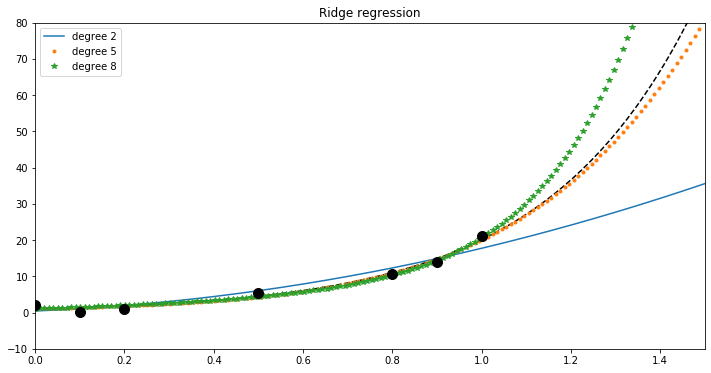

In [14]:
ridge = lm.RidgeCV()

fig, ax = plt.subplots(1, 1, figsize=(12, 6))
ax.plot(x_tr, y_tr, '--k')

for deg, s in zip([2, 5, 8], ['-', '.', '*']):
    ridge.fit(np.vander(x, deg + 1), y)
    y_ridge = ridge.predict(np.vander(x_tr, deg + 1))
    ax.plot(x_tr, y_ridge, s,
            label='degree ' + str(deg))
    ax.legend(loc=2)
    ax.set_xlim(0, 1.5)
    ax.set_ylim(-10, 80)
    # Print the model's coefficients.
    print(f'Coefficients, degree {deg}:',
          ' '.join(f'{c:.2f}' for c in ridge.coef_))

ax.plot(x, y, 'ok', ms=10)
ax.set_title("Ridge regression")

Coefficients, degree 2: 17.56 0.00 0.00
Coefficients, degree 5: 7.91 0.00 0.00 10.55 0.00 0.00
Coefficients, degree 8: 5.88 0.00 0.00 0.00 0.00 0.00 12.92 0.00 0.00


Text(0.5, 1.0, 'Ridge regression')

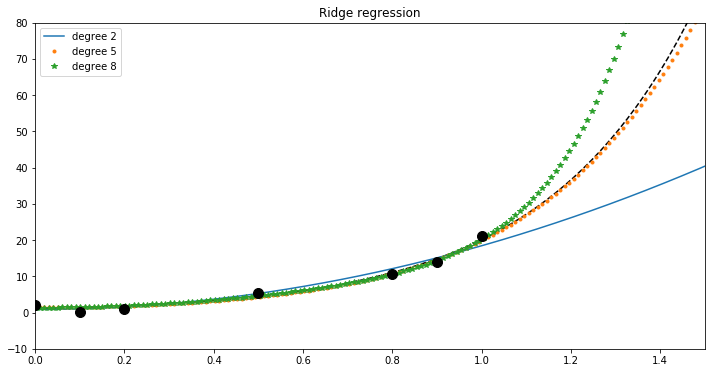

In [13]:
ridge = lm.Lasso(alpha=0.1)

fig, ax = plt.subplots(1, 1, figsize=(12, 6))
ax.plot(x_tr, y_tr, '--k')

for deg, s in zip([2, 5, 8], ['-', '.', '*']):
    ridge.fit(np.vander(x, deg + 1), y)
    y_ridge = ridge.predict(np.vander(x_tr, deg + 1))
    ax.plot(x_tr, y_ridge, s,
            label='degree ' + str(deg))
    ax.legend(loc=2)
    ax.set_xlim(0, 1.5)
    ax.set_ylim(-10, 80)
    # Print the model's coefficients.
    print(f'Coefficients, degree {deg}:',
          ' '.join(f'{c:.2f}' for c in ridge.coef_))

ax.plot(x, y, 'ok', ms=10)
ax.set_title("Ridge regression")